# ใช้งาน Model Handwritten digit recognition
Handwritten digit use model.inpy

In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

model = joblib.load('digit_recognition_model.pkl')

In [2]:
model

SVC()

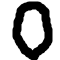

In [3]:
from PIL import Image, ImageOps

imgfile = 'data/digits/digit0.png'      # digit image file (number zero)

img = Image.open(imgfile).convert('L')  # convert to grayscale
img

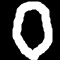

In [4]:
img = ImageOps.invert(img)              # invert
img

In [5]:
img = img.resize((8, 8), Image.ANTIALIAS)  # resize to 8x8 and antialias
img

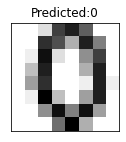

In [6]:
pixel = np.array(img)  # 8x8
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')

my_digit = pixel.reshape(1, -1)  # 1x64
predicted = model.predict(my_digit)
#     print('Digit:{}'. format(predicted[0]))

plt.figure(figsize=(2, 2))
plt.imshow(pixel, cmap=plt.cm.gray_r)
plt.title('Predicted:{}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()

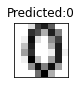

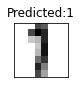

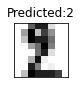

In [7]:
# function สำหรับ Predict หลายรูป
import numpy as np
from PIL import Image, ImageOps

def predict_digit(imgfile):
    img = Image.open(imgfile).convert('L') 
    img = ImageOps.invert(img)
    img = img.resize((8, 8), Image.ANTIALIAS)  # antialias resize

    pixel = np.array(img)
    pixel = pixel / 255.0 * 16
    pixel = pixel.astype('int')
    
    my_digit = pixel.reshape(1, -1)
    predicted = model.predict(my_digit)
#     print('Digit:{}'. format(predicted[0]))
    
    plt.figure(figsize=(1,1))
    plt.imshow(pixel, cmap=plt.cm.gray_r)
    plt.title('Predicted:{}'. format(predicted[0]))
    plt.xticks([])
    plt.yticks([])    
    plt.show()

imgfiles = ['data/digits/digit0.png',
            'data/digits/digit1.png',
            'data/digits/digit2.png']
for i in imgfiles:
    predict_digit(i)